In [88]:
import pandas as pd
import numpy as np 
import seaborn as sns
from imblearn.over_sampling import *
from sklearn import preprocessing

In [89]:
df=pd.read_excel('Copy of credit_data.xlsx')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- membuka file excel
- menampilkan 5 data teratas

In [90]:
df.shape

(614, 13)

terdapat 13 kolom 

In [91]:
#cek missing value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

terdapat missing value pada kolom Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

In [92]:
#cek tipe data
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# prerocessing

In [93]:
#mengisi nilai gender menggunakan modus
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

#mengisi nilai married menggunakan modus
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

#mengisi nilai Dependents dengan modus
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

#mengisi nilai Self_Employed dengan modus
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

#mengisi nilai LoanAmount dengan rata-rata
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

#mengisi nilai Loan_Amount_Term dengan rata-rata
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

#mengisi nilai Credit_History dengan modus
                                                     
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#cek missing value gender & married
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Explorasi








In [94]:
#loan_status sebagai label

#grouping
group1=df.groupby('Gender').Loan_Status.value_counts()

#melihat kira-kira berapa banyak kategori gender berdasarkan loan status

gender_status=pd.crosstab(df.Gender, df.Loan_Status)
print( group1)
gender_status

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64


Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [95]:
#melihat berapa banyak kategori married berdasarkan loan
group2=df.groupby('Married').Loan_Status.value_counts()
married_status=pd.crosstab(df.Married,df.Loan_Status)

print(group2)
married_status


Married  Loan_Status
No       Y              134
         N               79
Yes      Y              288
         N              113
Name: Loan_Status, dtype: int64


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [96]:
#melihat berapa banyak kategori married,gender berdasarkan loan
group3=df.groupby(['Gender','Married']).Loan_Status.value_counts()
gm_status=pd.crosstab([df.Gender,df.Married],df.Loan_Status)

print(group3)
gm_status

Gender  Married  Loan_Status
Female  No       Y               51
                 N               29
        Yes      Y               24
                 N                8
Male    No       Y               83
                 N               50
        Yes      Y              264
                 N              105
Name: Loan_Status, dtype: int64


Loan_Status       N    Y
Gender Married          
Female No        29   51
       Yes        8   24
Male   No        50   83
       Yes      105  264

# Dummy Data

tujuan: mengubah data kategorik menjadi numerik

Male      502
Female    112
Name: Gender, dtype: int64


C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


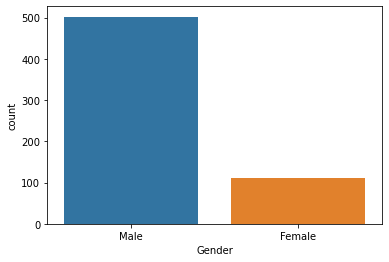

In [97]:
print(pd.value_counts(df.Gender))
ax = sns.countplot(df['Gender'])

Yes    401
No     213
Name: Married, dtype: int64


C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


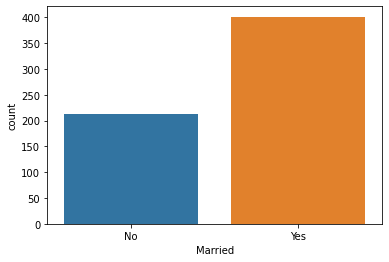

In [98]:
print(pd.value_counts(df.Married))
bx = sns.countplot(df['Married'])

No     532
Yes     82
Name: Self_Employed, dtype: int64


C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


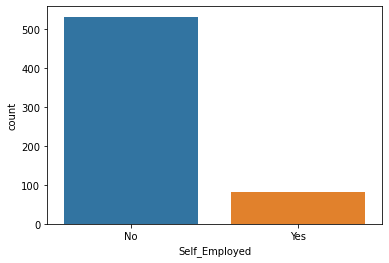

In [99]:
print(pd.value_counts(df.Self_Employed))
cx = sns.countplot(df['Self_Employed'])

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


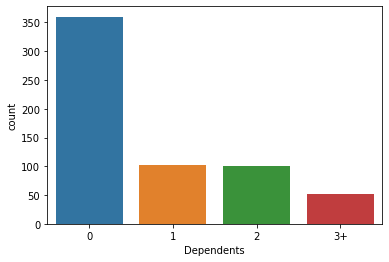

In [100]:
print(pd.value_counts(df.Dependents))
dx = sns.countplot(df['Dependents'])

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


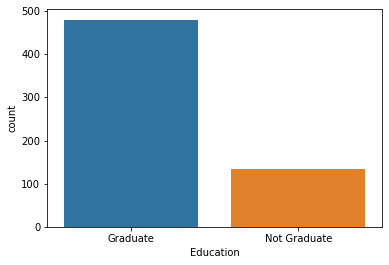

In [101]:
print(pd.value_counts(df.Education))
dx = sns.countplot(df['Education'])

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


C:\Users\tamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


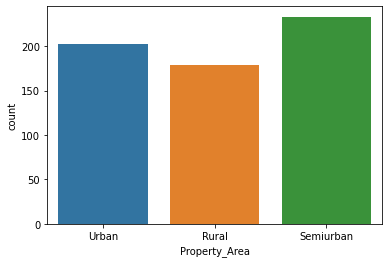

In [102]:
print(pd.value_counts(df.Property_Area))
ex = sns.countplot(df['Property_Area'])

In [103]:
#Gender
map_Gender=dict(zip(set(df['Gender']),[1,2]))
df['Gender']=df['Gender'].apply(lambda x:map_Gender[x])
map_Gender

{'Female': 1, 'Male': 2}

In [104]:
#Married
map_married=dict(zip(set(df['Married']),[1,2]))
df['Married']=df['Married'].apply(lambda x:map_married[x])
map_married

{'No': 1, 'Yes': 2}

In [105]:
#Self_Employed
map_Self_Employed=dict(zip(set(df['Self_Employed']),[1,2]))
df['Self_Employed']=df['Self_Employed'].apply(lambda x:map_Self_Employed[x])
map_Self_Employed

{'No': 1, 'Yes': 2}

In [106]:
#Dependents
map_Dependents=dict(zip(set(df['Dependents']),[1,2,3,4]))
df['Dependents']=df['Dependents'].apply(lambda x:map_Dependents[x])
map_Dependents

{0: 1, 1: 2, 2: 3, '3+': 4}

In [107]:
#Education
map_Education=dict(zip(set(df['Education']),[1,2]))
df['Education']=df['Education'].apply(lambda x:map_Education[x])
map_Education

{'Not Graduate': 1, 'Graduate': 2}

In [108]:
#Property_Area
map_Property_Area=dict(zip(set(df['Property_Area']),[1,2,3]))
df['Property_Area']=df['Property_Area'].apply(lambda x:map_Property_Area[x])
map_Property_Area

{'Semiurban': 1, 'Urban': 2, 'Rural': 3}

In [109]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,1,1,2,1,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,2,2,2,2,1,4583,1508.0,128.000000,360.0,1.0,3,N
2,LP001005,2,2,1,2,2,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,2,2,1,1,1,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,2,1,1,2,1,6000,0.0,141.000000,360.0,1.0,2,Y


# Remove unnecessary attributes

In [110]:
df.drop('Loan_ID',axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,1,2,1,5849,0.0,146.412162,360.0,1.0,2,Y
1,2,2,2,2,1,4583,1508.0,128.000000,360.0,1.0,3,N
2,2,2,1,2,2,3000,0.0,66.000000,360.0,1.0,2,Y
3,2,2,1,1,1,2583,2358.0,120.000000,360.0,1.0,2,Y
4,2,1,1,2,1,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,1,2,1,2900,0.0,71.000000,360.0,1.0,3,Y
610,2,2,4,2,1,4106,0.0,40.000000,180.0,1.0,3,Y
611,2,2,2,2,1,8072,240.0,253.000000,360.0,1.0,2,Y
612,2,2,3,2,1,7583,0.0,187.000000,360.0,1.0,2,Y


In [111]:
df.to_csv('datatrain.csv')

In [112]:
y=df.pop('Loan_Status')
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

# Handling Imbalance Data

In [113]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [122]:
ros=SMOTE(sampling_strategy='all')
print(ros.fit(df,y))



SMOTE()


In [127]:
x_oversample,y_oversample=ros.fit_resample(df,y)
print(x_oversample.shape,y_oversample.shape)

(844, 11) (844,)


In [116]:
kolom=[('Gender'),('Married'),('Dependents'),('Education'),
      ('Self_Employed'),('ApplicantIncome'),('CoapplicantIncome'),
      ('LoanAmount'),('Loan_Amount_Term'),('Credit_History'),('Property_Area')]

In [117]:
x_oversample_df=pd.DataFrame(x_oversample)
x_oversample_df.index

RangeIndex(start=0, stop=844, step=1)

In [118]:
x_oversample

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,1,2,1,5849,0.000000,146.412162,360.000000,1.000000,2
1,2,2,2,2,1,4583,1508.000000,128.000000,360.000000,1.000000,3
2,2,2,1,2,2,3000,0.000000,66.000000,360.000000,1.000000,2
3,2,2,1,1,1,2583,2358.000000,120.000000,360.000000,1.000000,2
4,2,1,1,2,1,6000,0.000000,141.000000,360.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,1,1,1,1489,0.000000,39.411704,360.000000,0.931067,1
840,2,1,1,1,1,3732,2558.974045,171.948326,360.000000,0.929888,2
841,2,2,2,1,1,6047,0.000000,211.425682,299.313988,0.505717,1
842,1,1,1,2,1,4199,0.000000,113.912192,360.000000,0.521952,1


In [128]:
x_oversample2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,2,1,1,2,1,5849,0.000000,146.412162,360.000000,1.000000,2
2,2,2,2,2,1,4583,1508.000000,128.000000,360.000000,1.000000,3
3,2,2,1,2,2,3000,0.000000,66.000000,360.000000,1.000000,2
4,2,2,1,1,1,2583,2358.000000,120.000000,360.000000,1.000000,2
5,2,1,1,2,1,6000,0.000000,141.000000,360.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
840,1,1,1,1,1,1489,0.000000,39.411704,360.000000,0.931067,1
841,2,1,1,1,1,3732,2558.974045,171.948326,360.000000,0.929888,2
842,2,2,2,1,1,6047,0.000000,211.425682,299.313988,0.505717,1
843,1,1,1,2,1,4199,0.000000,113.912192,360.000000,0.521952,1


In [119]:
x_oversample_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,2,1,1,2,1,5849,0.000000,146.412162,360.000000,1.000000,2
1,2,2,2,2,1,4583,1508.000000,128.000000,360.000000,1.000000,3
2,2,2,1,2,2,3000,0.000000,66.000000,360.000000,1.000000,2
3,2,2,1,1,1,2583,2358.000000,120.000000,360.000000,1.000000,2
4,2,1,1,2,1,6000,0.000000,141.000000,360.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,1,1,1,1489,0.000000,39.411704,360.000000,0.931067,1
840,2,1,1,1,1,3732,2558.974045,171.948326,360.000000,0.929888,2
841,2,2,2,1,1,6047,0.000000,211.425682,299.313988,0.505717,1
842,1,1,1,2,1,4199,0.000000,113.912192,360.000000,0.521952,1


In [120]:
x_oversample_df.index+=1

In [121]:
x_oversample2=pd.DataFrame(x_oversample,x_oversample_df.index,columns=kolom)
x_oversample2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,2,1,1,2,1,5849,0.000000,146.412162,360.000000,1.000000,2
2,2,2,2,2,1,4583,1508.000000,128.000000,360.000000,1.000000,3
3,2,2,1,2,2,3000,0.000000,66.000000,360.000000,1.000000,2
4,2,2,1,1,1,2583,2358.000000,120.000000,360.000000,1.000000,2
5,2,1,1,2,1,6000,0.000000,141.000000,360.000000,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
840,1,1,1,1,1,1489,0.000000,39.411704,360.000000,0.931067,1
841,2,1,1,1,1,3732,2558.974045,171.948326,360.000000,0.929888,2
842,2,2,2,1,1,6047,0.000000,211.425682,299.313988,0.505717,1
843,1,1,1,2,1,4199,0.000000,113.912192,360.000000,0.521952,1
